<a href="https://colab.research.google.com/github/Ravneet7878/ML-Codes/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Entropy.

def entropy(X):
    n = X.shape[0]
    values, counts = np.unique(X, return_counts = True)

    return -np.sum((counts / n) * np.log2(counts / n))

In [ ]:
golf = pd.read_csv("golf.csv")
golf

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
# Split Data Corresponding To A Particular Feature.

def divide_data(golf, feature):
    DATA = {}

    feature_values = list(golf[feature].value_counts().index)
    frequency = list(golf[feature].value_counts())

    for values in feature_values:
        DATA[values] = {"golf" : pd.DataFrame([], columns = golf.columns), "len" : 0}

    for i in range(golf.shape[0]):
        value = golf[feature].iloc[i]

        DATA[value]["golf"] = pd.concat([DATA[value]["golf"], golf.iloc[[i]]])
        index = feature_values.index(value)
        DATA[value]["len"] = frequency[index]

    return DATA

In [ ]:
# Information Gain Function.

def information_gain(golf, feature):
    examples = golf.shape[0]

    DATA = divide_data(golf, feature)
    keys = DATA.keys()

    entropy_child = 0.0

    for key in keys:
        entropy_child += ((DATA[key]["len"] / examples) * entropy(DATA[key]["golf"]["Play"]))

    return entropy(golf["Play"]) - entropy_child

In [ ]:
# Creating A Decision Tree.

class Decision_tree:

      # Constructor
      def __init__(self, depth = 0, max_depth = 5):

          # Creating a node
          self.children = {}
          self.feature_key = None
          self.depth = depth
          self.max_depth = max_depth
          self.target = None

      def train(self, golf):
          features = list(golf.columns)
          features.remove("Play")

          info_gain = []

          for i in features:
              info_gain.append(information_gain(golf, i))

          # Finding the feature with maximum information gain
          self.feature_key = features[np.argmax(info_gain)]

          # Splitting the data associated with the key feature
          DATA = divide_data(golf, self.feature_key)

          # Giving a target label to the node
          labels = list(golf["Play"].value_counts().index)
          frequency = list(golf["Play"].value_counts().values)

          self.target = labels[np.argmax(frequency)]

          # Stopping conditions -

          have_data = 0
          keys = DATA.keys()

          for key in keys:
              if DATA[key]["len"] > 0:
                 have_data += 1

          # 1) If it is a Pure Node.
          if have_data < 2:
             return

          # 2) Early stop i.e is if the tree have reached maximum depth.
          if self.depth >= self.max_depth:
             return

          print("\t" * self.depth + "Making Tree With ->", self.feature_key)

          # Recursively Train The Child
          for key in keys:
              new_data = DATA[key]["golf"]
              self.children[key] = Decision_tree(depth = self.depth + 1)
              self.children[key].train(new_data)

          return

      def predict(self, test):
          if self.children == {}:
             return self.target

          return self.children[test[self.feature_key][0]].predict(test)

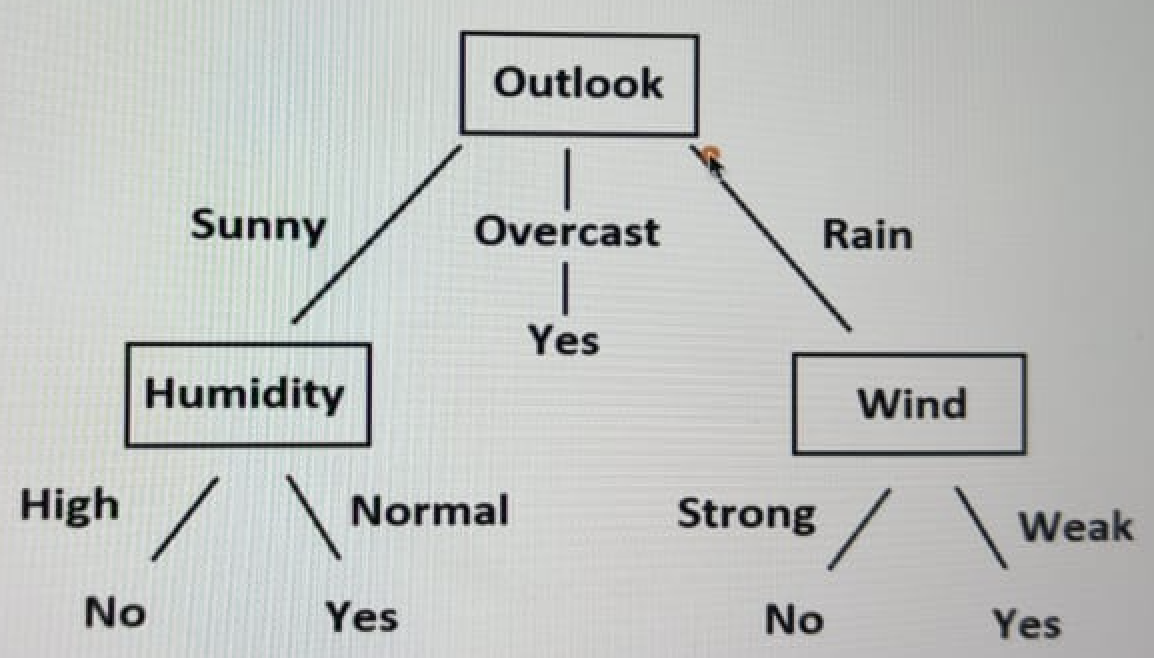

In [ ]:
model = Decision_tree()

In [ ]:
model.train(golf)

Making Tree With -> Outlook
	Making Tree With -> Humidity
	Making Tree With -> Windy


In [ ]:
model.target

'yes'

In [ ]:
model.feature_key

'Outlook'

In [ ]:
model.children

{'sunny': <__main__.Decision_tree at 0x7911d1f63670>,
 'rainy': <__main__.Decision_tree at 0x7911db22bd90>,
 'overcast': <__main__.Decision_tree at 0x7911d1f63c10>}

In [ ]:
model.children["sunny"].feature_key

'Humidity'

In [ ]:
model.children["sunny"].children["high"].target

'no'

In [ ]:
model.children["sunny"].children["high"].children

{}

In [ ]:
model.children["overcast"].target

'yes'

In [ ]:
model.children["overcast"].children

{}

In [ ]:
X_test = pd.DataFrame([["sunny", "cool", "high", False]], columns = list(golf.columns.values[: -1]))

In [ ]:
X_test

,Outlook,Temperature,Humidity,Windy
0,sunny,cool,high,False


In [ ]:
model.predict(X_test)

'no'